**Problem Statement**

The problem is to detect wheather a given image of a cell is infected by parasite or not, if we can make a machine learning model then we can save humans by detecting and deploying Image Cells that contain Malaria or not!

**Dataset**

The Dataset is taken from Kaggle https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria.
The dataset contains thousands of images of both the categories with malaria and without malaria, thus the model should have a good accuracy.


**Technology used**

For this problem we will be using Transfer Learning with ImageDataGenerator.
Generally VGG16 and VGG19 gives the best accuracy, so here we will be using VGG16

#Step 1 - Importing the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input

# Step 2 - Defining some variables, path and constants

In [3]:
train_path = '/content/drive/My Drive/Data Science Projects/dataset_malaria_short/training_set'
validation_path = '/content/drive/My Drive/Data Science Projects/dataset_malaria_short/test_set'

IMAGE_SIZE = [264, 264] 
BATCH_SIZE = 128        
NO_OF_TRAIN_IMAGES = 4000
NO_OF_TEST_IMAGES = 1000

# Step 3 - Creating Image Data Generator

In [4]:
train_gen = ImageDataGenerator (
              rotation_range = 20, 
              width_shift_range = 0.1,
              height_shift_range = 0.1,
              shear_range = 0.1, 
              zoom_range = 0.2,
              horizontal_flip = True, 
              preprocessing_function = preprocess_input    
              ) 
test_gen = ImageDataGenerator( preprocessing_function = preprocess_input)

train_set = train_gen.flow_from_directory(train_path, shuffle = True, target_size = IMAGE_SIZE, batch_size = BATCH_SIZE)
test_set = train_gen.flow_from_directory(validation_path, target_size = IMAGE_SIZE, batch_size = BATCH_SIZE)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Step 4 - Setting up pretrained model

In [5]:
vgg19 = VGG19(input_shape = IMAGE_SIZE+[3], weights = 'imagenet', include_top = False)  #Default Image size with 3D layer of RGB, weights from imagenet and not inluding top layer as we will be making it manually
vgg19.trainable = False                                                                 #To freeze the weights of model

80142336/80134624 [==============================] - 1s 0us/step


# Step 5 - Creating top layer and training the model



In [6]:
x = Flatten()(vgg19.output)
x = Dense(2, activation = 'softmax' )(x)

model = Model(inputs = vgg19.input, outputs = x)
model.summary()

model.compile (optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

his = model.fit(train_set, validation_data = test_set, epochs = 25,
                            steps_per_epoch= 12, validation_steps = 6)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 264, 264, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 264, 264, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 264, 264, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 132, 132, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 132, 132, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 132, 132, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 66, 66, 128)      

# Step 6 - Plotting Loss and Accuracy

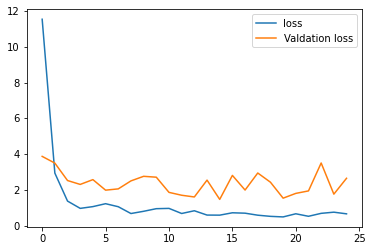

In [7]:
#Plotting Loss

plt.plot(his.history['loss'], label = 'loss')
plt.plot(his.history['val_loss'], label = 'Valdation loss')
plt.legend()



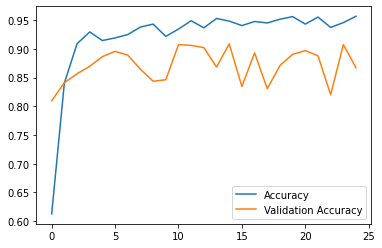

In [8]:
# Plot accuracy per iteration

plt.plot(his.history['accuracy'], label='Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Step 7 - Saving the model

In [9]:
model.save_weights('model', save_format = 'h5') # Saving model weights

import json

with open('model_config.json', 'w') as file:
  file.write(model.to_json())                   # Saving model config file

# Step 8 - Predicting a single image to check the model

In [11]:
# Predicted a singe Image

test_image = image.load_img('/content/drive/My Drive/Data Science Projects/test2p.png', target_size = (264, 264))
test_image = image.img_to_array(test_image)
test_image = preprocess_input(test_image)
test_image = np.expand_dims(test_image, axis=0) #Since model expects a batch dimension
                                                #which is the first dimension of image

result = model.predict(test_image)
print(result)
result = result.argmax(axis = 1)[0]

if(result==0):
  print('Its a Parasite')
else:
  print('its Uninfected')

[[9.9999857e-01 1.4330519e-06]]
Its a Parasite


**Conclusion**

The model gives approximately 90% accuracy which is a good accuracy for this kind of problem, thus the model is successful.

